In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import NearMiss

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

# Import Data

In [2]:
!wget https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip

--2022-08-28 08:22:38--  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip
Resolving rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)... 52.219.124.63
Connecting to rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)|52.219.124.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721616255 (688M) [application/zip]
Saving to: ‘home-credit-default-risk.zip’

home-credit-default 100%[===================>] 688.19M  49.5MB/s    in 13s     

2022-08-28 08:22:52 (51.0 MB/s) - ‘home-credit-default-risk.zip’ saved [721616255/721616255]



In [3]:
!unzip home-credit-default-risk.zip -d data/

Archive:  home-credit-default-risk.zip
  inflating: data/HomeCredit_columns_description.csv  
  inflating: data/POS_CASH_balance.csv  
  inflating: data/application_test.csv  
  inflating: data/application_train.csv  
  inflating: data/bureau.csv         
  inflating: data/bureau_balance.csv  
  inflating: data/credit_card_balance.csv  
  inflating: data/installments_payments.csv  
  inflating: data/previous_application.csv  
  inflating: data/sample_submission.csv  


In [ ]:
!wget https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip
!unzip home-credit-default-risk.zip -d data/
df_app_train = pd.read_csv('data/application_train.csv')
df_app_test = pd.read_csv('data/application_test.csv')

In [4]:
df_desc = pd.read_csv('data/HomeCredit_columns_description.csv', encoding='latin1')
df_desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [5]:
df_desc[df_desc['Table'] == 'application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [3]:
df_app_train = pd.read_csv('data/application_train.csv')
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_app_test = pd.read_csv('data/application_test.csv')
df_app_test.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

Pada tahap ini, dilakukan penanganan untuk data yang bernilai kosong. Untuk data numerik, data kosong diisi menggunakan median. Adapun alasan pemilihan median dibandingkan nilai rata-rata adalah dikarenakan median lebih robust terhadap data pencilan. Sedangkan untuk data kategorik diisi dengan nilai modusnya. Berikutnya adalah melakukan encoding pada data kategorik agar dapat diproses oleh model.

Pada tahap ini juga dilakukan pemilihan fitur. Seperti yang diketahui bahwa pada kasus ini data sangatlah besar. Oleh sebab itu, agar kita bisa fokus dengan fitur yang benar-benar memiliki pengaruh terhadap data target saja, diperlukan pemilihan fitur. Yang menjadi acuan dalam pemilihan fitur adalah nilai statistik uji Chi Square untuk fitur kategorik dan statistik uji F untuk fitur numerik. Jika p-value statistik uji kurang dari 0,5; maka dapat dikatakan bahwa fitur mempengaruhi data target secara signifikan, sehingga layak digunakan untuk model.

In [5]:
def fill_na_num_cat(df):
  column_cat = df.select_dtypes(include=np.dtype('object')).columns
  column_num = df.select_dtypes(include=np.number).columns

  for col in column_cat:
    mode_col = df[col].mode()[0]
    df[col] = df[col].fillna(value=mode_col)

  for col in column_num:
    median_col = df[col].median()
    df[col] = df[col].fillna(value=median_col)

  return df

df_app_train = fill_na_num_cat(df_app_train)
df_app_test = fill_na_num_cat(df_app_test)

In [6]:
column_cat = df_app_train.select_dtypes(include=np.dtype('object')).columns

encoder = OrdinalEncoder()
df_app_train[column_cat] = encoder.fit_transform(df_app_train[column_cat])
df_app_test[column_cat] = encoder.transform(df_app_test[column_cat])

In [102]:
X = df_app_train.drop(columns=['SK_ID_CURR', 'TARGET'])
y = df_app_train['TARGET']
X_test = df_app_test.drop(columns='SK_ID_CURR')

stats_num = f_classif(X, y)
stats_cat = chi2(np.abs(X), y)

cond = ((f_classif(X, y)[1] < 0.5) + (chi2(np.abs(X), y)[1] < 0.5)) > 0
col_sig_idx = np.nonzero(cond)[0]
X = X.iloc[:, col_sig_idx]
X_test = X_test.iloc[:, col_sig_idx]

# Model Fitting

Sebelum melakukan pembentukan model, mula-mula dilakukan downsampling agar data yang digunakan untuk pelatihan model seimbang. Pada kasus ini, model yang dibandingkan adalah Logistic Regression, Ridge, Decision Tree, dan Random Forest. Metrik yang digunakan pada kasus ini adalah recall. Sebab, untuk kasus jasa keuangan, diharuskan untuk memprediksi dengan benar orang-orang yang berpotensi kesulitan membayar.

In [70]:
# frekuensi label sebelum undersampling
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

([<matplotlib.patches.Wedge at 0x7f35e0ccde10>,
 [Text(-1.0648123216659293, 0.27599768047650985, 'Lainnya'),
  Text(1.0648123152057372, -0.27599770540024077, 'Kesulitan bayar')],
 [Text(-0.5808067209086887, 0.15054418935082356, '92%'),
  Text(0.5808067173849475, -0.15054420294558588, '8%')])

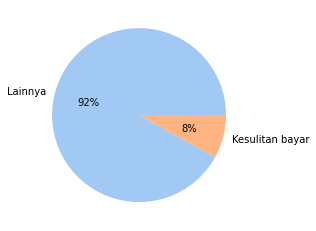

In [73]:
plt.pie(y.value_counts(), labels=['Lainnya', 'Kesulitan bayar'], 
        colors=sns.color_palette('pastel', n_colors=2), autopct='%.0f%%')

In [74]:
undersample = NearMiss(version=3, n_neighbors=5)
X, y = undersample.fit_resample(X, y)

In [75]:
# frekuensi label setelah undersampling
y.value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

([<matplotlib.patches.Wedge at 0x7f35e0acf9d0>,
 [Text(6.735557395310444e-17, 1.1, 'Lainnya'),
  Text(-2.0206672185931328e-16, -1.1, 'Kesulitan dalam Pembayaran')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-1.1021821192326178e-16, -0.6, '50%')])

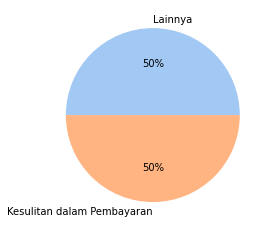

In [76]:
plt.pie(y.value_counts(), labels=['Lainnya', 'Kesulitan dalam Pembayaran'], colors=sns.color_palette('pastel', n_colors=2), autopct='%.0f%%')

In [77]:
def fit_report_model(sklearn_model, X, y, random_state_val = 124):
    cv = cross_val_score(sklearn_model, X, y, cv=4,
                            scoring='accuracy')
    print('cross validation:')
    print('mean accuracy: ', cv.mean())
    print('std accuracy: ', cv.std())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                        random_state=random_state_val, 
                                                        stratify=y)
    sklearn_model.fit(X_train, y_train)

    print('train report:')
    y_pred_train = sklearn_model.predict(X_train)
    print(classification_report(y_train, y_pred_train))

    print('Validation report:')
    y_pred_test = sklearn_model.predict(X_test)
    print(classification_report(y_test, y_pred_test))

In [78]:
logistic_model = LogisticRegression()
fit_report_model(logistic_model, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cross validation:
mean accuracy:  0.5502502914970762
std accuracy:  0.046495914532220406
train report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60     18618
           1       0.60      0.60      0.60     18619

    accuracy                           0.60     37237
   macro avg       0.60      0.60      0.60     37237
weighted avg       0.60      0.60      0.60     37237

Validation report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      6207
           1       0.60      0.60      0.60      6206

    accuracy                           0.60     12413
   macro avg       0.60      0.60      0.60     12413
weighted avg       0.60      0.60      0.60     12413



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [79]:
ridge_model = RidgeClassifier()
fit_report_model(ridge_model, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.24827e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.3413e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.20072e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.36192e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


cross validation:
mean accuracy:  0.6697468635651929
std accuracy:  0.03691039933062725


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.02207e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


train report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70     18618
           1       0.70      0.68      0.69     18619

    accuracy                           0.69     37237
   macro avg       0.69      0.69      0.69     37237
weighted avg       0.69      0.69      0.69     37237

Validation report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      6207
           1       0.69      0.67      0.68      6206

    accuracy                           0.69     12413
   macro avg       0.69      0.69      0.69     12413
weighted avg       0.69      0.69      0.69     12413



In [80]:
tree_model = DecisionTreeClassifier()
fit_report_model(tree_model, X, y)

cross validation:
mean accuracy:  0.6130715282718348
std accuracy:  0.021778739080870264
train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18618
           1       1.00      1.00      1.00     18619

    accuracy                           1.00     37237
   macro avg       1.00      1.00      1.00     37237
weighted avg       1.00      1.00      1.00     37237

Validation report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      6207
           1       0.63      0.64      0.64      6206

    accuracy                           0.63     12413
   macro avg       0.63      0.63      0.63     12413
weighted avg       0.63      0.63      0.63     12413



In [81]:
forest_model = RandomForestClassifier()
fit_report_model(forest_model, X, y)

cross validation:
mean accuracy:  0.6697265400315426
std accuracy:  0.05049310200257135
train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18618
           1       1.00      1.00      1.00     18619

    accuracy                           1.00     37237
   macro avg       1.00      1.00      1.00     37237
weighted avg       1.00      1.00      1.00     37237

Validation report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      6207
           1       0.73      0.68      0.70      6206

    accuracy                           0.71     12413
   macro avg       0.71      0.71      0.71     12413
weighted avg       0.71      0.71      0.71     12413



Pada Random Forest, dapat dilihat bahwa recall data validasi memiliki nilai yang paling besar dibandingkan yang lainnya. Akan tetapi, recall data training sangat sempurna. Ini berkemungkinan bahwa terjadi overfitting. Begitupun juga yang terjadi pada Decision Tree. Oleh sebab itu, model yang lebih tepat untuk dipilih adalah model Ridge. Meskipun nilai recall tidak sebesar Random Forest, namun selisih recall antara data training dan data validation tidak besar. Berikutnya akan dilakukan hyperparameter tuning pada model Ridge.

In [89]:
alpha = np.linspace(start=0.1, stop=1, num=10)
fit_intercept = [True, False]
normalize = [True, False]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

param_option = {'alpha': alpha,
                'fit_intercept': fit_intercept,
                'normalize': normalize,
                'solver': solver}

ridge_opt = RandomizedSearchCV(estimator=ridge_model, param_distributions=param_option,
                               n_iter=10, cv=4, verbose=2, random_state=124, n_jobs=-1)
ridge_opt.fit(X, y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


RandomizedSearchCV(cv=4, estimator=RidgeClassifier(), n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   random_state=124, verbose=2)

In [90]:
ridge_opt.best_estimator_

RidgeClassifier(alpha=0.30000000000000004, fit_intercept=False, normalize=False,
                solver='svd')

Dari hasil hyperparameter tuning, dapat dilihat bahwa nilai parameter optimal berbeda dengan nilai parameter default. Misalnya seperti nilai alpha, yang mana nilai defaultnya adalah 1 dan nilai optimalnya adalah 0,3.

In [103]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=124, stratify=y)

print('train report:')
y_pred_train = ridge_opt.predict(X_train)
print(classification_report(y_train, y_pred_train))

print('validation report:')
y_pred_val = ridge_opt.predict(X_val)
print(classification_report(y_val, y_pred_val))

train report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77    212014
           1       0.14      0.68      0.24     18619

    accuracy                           0.64    230633
   macro avg       0.55      0.66      0.50    230633
weighted avg       0.89      0.64      0.73    230633

validation report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77     70672
           1       0.14      0.68      0.24      6206

    accuracy                           0.64     76878
   macro avg       0.55      0.66      0.50     76878
weighted avg       0.89      0.64      0.73     76878



Dapat dilihat bahwa ternyata model Ridge dengan ataupun tanpa proses hyperparameter memiliki hasil yang hampir sama.

In [106]:
r = permutation_importance(ridge_opt, X_val, y_val, n_repeats=30, random_state=124, scoring='recall')

In [112]:
r = permutation_importance(ridge_opt, X_val, y_val, n_repeats=30, random_state=124, scoring='recall')

for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{X_val.columns[i]:<8} "
          f"{r.importances_mean[i]:.3f}"  
          f" +/- {r.importances_std[i]:.3f}")

EXT_SOURCE_3 0.095 +/- 0.004
EXT_SOURCE_2 0.078 +/- 0.004
FLAG_EMP_PHONE 0.052 +/- 0.004
AMT_CREDIT 0.020 +/- 0.004
EXT_SOURCE_1 0.016 +/- 0.002
CNT_CHILDREN 0.016 +/- 0.002
NAME_EDUCATION_TYPE 0.011 +/- 0.002
CODE_GENDER 0.010 +/- 0.002
CNT_FAM_MEMBERS 0.010 +/- 0.002
ELEVATORS_AVG 0.009 +/- 0.002
YEARS_BUILD_MEDI 0.008 +/- 0.001
REGION_RATING_CLIENT_W_CITY 0.008 +/- 0.001
OBS_30_CNT_SOCIAL_CIRCLE 0.008 +/- 0.002
LIVINGAREA_MEDI 0.007 +/- 0.001
FLOORSMAX_AVG 0.006 +/- 0.001
FLAG_OWN_CAR 0.006 +/- 0.002
BASEMENTAREA_AVG 0.006 +/- 0.001
FLAG_DOCUMENT_3 0.006 +/- 0.001
NAME_FAMILY_STATUS 0.006 +/- 0.002
DAYS_ID_PUBLISH 0.005 +/- 0.002
LIVINGAPARTMENTS_MODE 0.005 +/- 0.001
FLAG_WORK_PHONE 0.004 +/- 0.002
APARTMENTS_MEDI 0.004 +/- 0.001
COMMONAREA_MEDI 0.004 +/- 0.001
AMT_REQ_CREDIT_BUREAU_QRT 0.003 +/- 0.001
FLOORSMIN_MODE 0.002 +/- 0.001
FLAG_PHONE 0.002 +/- 0.001
YEARS_BEGINEXPLUATATION_MEDI 0.001 +/- 0.001
FLAG_DOCUMENT_2 0.000 +/- 0.000


Feature Importance dengan nilai terbesar di antaranya adalah EXT_SOURCE_3, EXT_SOURCE_2, FLAG_EMP_PHONE, dst. Ini bisa menjadi acuan bagi manajer keuangan dalam mempertimbangkan peminjaman uang pada kostumer. 

In [114]:
y_pred_opt = ridge_opt.predict(X_test)
df_test = pd.DataFrame(dict(
    SK_ID_CURR = df_app_test['SK_ID_CURR'],
    TARGET = y_pred_opt
))
df_test.to_csv('data/output/test_submission.csv', header=False)